<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Finance with Python

**Chapter 05 &mdash; Static Economy**

In [1]:
%matplotlib inline
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.family'] = 'serif'

## Numerical Examples

In [2]:
import numpy as np

In [3]:
np.random.seed(100)

In [4]:
I = 1000

In [5]:
S = np.random.normal(loc=100, scale=20, size=I)

In [6]:
S[:14].round(2)

array([  65.  ,  106.85,  123.06,   94.95,  119.63,  110.28,  104.42,
         78.6 ,   96.21,  105.1 ,   90.84,  108.7 ,   88.33,  116.34])

In [7]:
S.mean()

99.664556853121809

In [8]:
P = np.random.random(I)

In [9]:
P[:10]

array([ 0.07900097,  0.36885365,  0.06569738,  0.22359775,  0.25101289,
        0.94174837,  0.11820477,  0.81407226,  0.34055796,  0.79935242])

In [10]:
P /= P.sum()

In [11]:
P.sum()

1.0

In [12]:
P[:10]

array([ 0.00016552,  0.00077283,  0.00013765,  0.00046849,  0.00052593,
        0.00197318,  0.00024767,  0.00170567,  0.00071355,  0.00167482])

In [13]:
np.dot(P, S)

99.489092096803773

## Financial Assets

In [14]:
import numpy as np

In [15]:
M = np.array((
    (11, 25, 0,  0,  25),
    (11, 20, 30, 15, 25),
    (11, 10, 0,  20, 10),
    (11, 5,  30, 15, 0),
    (11, 0,  0,  0,  0)
))

In [16]:
M0 = np.array(5 * [10.])

In [17]:
M0

array([ 10.,  10.,  10.,  10.,  10.])

In [18]:
M.mean(axis=0)

array([ 11.,  12.,  12.,  10.,  12.])

In [19]:
mu = M.mean(axis=0) / M0 - 1

In [20]:
mu

array([ 0.1,  0.2,  0.2,  0. ,  0.2])

In [21]:
(M / M0 - 1)

array([[ 0.1,  1.5, -1. , -1. ,  1.5],
       [ 0.1,  1. ,  2. ,  0.5,  1.5],
       [ 0.1,  0. , -1. ,  1. ,  0. ],
       [ 0.1, -0.5,  2. ,  0.5, -1. ],
       [ 0.1, -1. , -1. , -1. , -1. ]])

In [22]:
sigma = (M / M0 - 1).std(axis=0)

In [23]:
sigma

array([ 0.        ,  0.92736185,  1.46969385,  0.83666003,  1.12249722])

## Contingent Claims

In [24]:
K = 15

In [25]:
C1 = np.maximum(M[:, 1] - K, 0)

In [26]:
C1

array([10,  5,  0,  0,  0])

In [27]:
phi = np.linalg.solve(M, C1)

In [28]:
phi.round(3)

array([-0.   ,  0.5  ,  0.017, -0.2  , -0.1  ])

In [29]:
C0 = np.dot(M0, phi)

In [30]:
C0

2.1666666666666665

## Market Completeness

In [31]:
import numpy as np

In [32]:
M = np.eye(5)

In [33]:
M

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [34]:
np.linalg.linalg.matrix_rank(M)

5

In [35]:
C1 = np.arange(10, 0, -2)

In [36]:
C1

array([10,  8,  6,  4,  2])

In [37]:
np.linalg.solve(M, C1)

array([ 10.,   8.,   6.,   4.,   2.])

In [38]:
M = np.random.randint(1, 10, (5, 5))

In [39]:
M

array([[6, 6, 7, 9, 7],
       [8, 2, 1, 3, 3],
       [8, 3, 7, 8, 6],
       [3, 3, 3, 2, 8],
       [8, 7, 1, 9, 4]])

In [40]:
np.linalg.linalg.matrix_rank(M)

5

In [41]:
np.linalg.linalg.matrix_rank(M.T)

5

In [42]:
phi = np.linalg.solve(M, C1)

In [43]:
phi

array([ 1.94664511,  5.04203719,  4.04122878, -4.79547292, -2.43734842])

In [44]:
np.dot(M, phi)

array([ 10.,   8.,   6.,   4.,   2.])

## Fundamental Theorems of Asset Pricing

In [45]:
import numpy as np

In [46]:
import scipy.optimize as sco

In [47]:
M = np.array((
    (11, 25, 0,  0,  25),
    (11, 20, 30, 15, 25),
    (11, 10, 0,  20, 10),
    (11, 5,  30, 15, 0),
    (11, 0,  0,  0,  0)
))

In [48]:
np.linalg.linalg.matrix_rank(M[:, :5])

5

In [49]:
M0 = np.ones(5) * 10

In [50]:
M0

array([ 10.,  10.,  10.,  10.,  10.])

In [51]:
r = 0.1

In [52]:
def E(Q):
    return np.sum((np.dot(M.T, Q) - M0 * (1 + r)) ** 2) 

In [53]:
E(np.array(5 * [0.2]))

4.0

In [54]:
cons = ({'type': 'eq', 'fun': lambda Q: Q.sum() - 1})

In [55]:
bnds = (5 * [(0, 1)])

In [56]:
bnds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [57]:
res = sco.minimize(E, 5 * [1],
                   method='SLSQP',
                   constraints=cons,
                   bounds=bnds)

In [58]:
Q = res['x'].round(5)

In [59]:
Q

array([ 0.14667,  0.18333,  0.275  ,  0.18333,  0.21167])

In [60]:
np.dot(M.T, Q) / (1 + r)

array([ 10.        ,  10.        ,   9.99981818,   9.99990909,  10.        ])

In [61]:
M0 * (1 + r)

array([ 11.,  11.,  11.,  11.,  11.])

## Black-Scholes-Merton Option Pricing

In [62]:
import math

In [63]:
import numpy as np

In [64]:
S0 = 100
r = 0.05
sigma = 0.2
T = 1.0
I = 10000

In [65]:
np.random.seed(100)

In [66]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T +
                 sigma * math.sqrt(T) * np.random.standard_normal(I))

In [67]:
ST[:8].round(1)

array([  72.6,  110.4,  129.8,   98. ,  125.4,  114.2,  107.7,   83.2])

In [68]:
ST.mean()

105.1801645479748

In [69]:
S0 * math.exp(r * T)

105.12710963760242

In [70]:
from pylab import plt

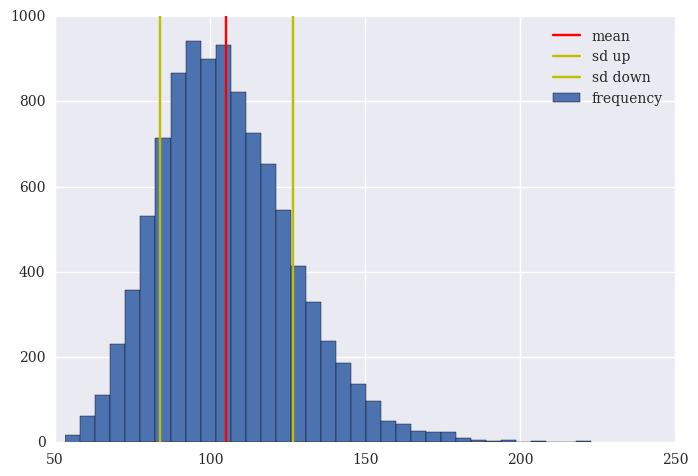

In [71]:
plt.hist(ST, bins=35, label='frequency');
plt.axvline(ST.mean(), color='r', label='mean')
plt.axvline(ST.mean() + ST.std(), color='y', label='sd up')
plt.axvline(ST.mean() - ST.std(), color='y', label='sd down')
plt.legend(loc=0)
# plt.savefig('../../images/ch05/bsm_01.png');

In [72]:
K = 105

In [73]:
CT = np.maximum(ST - K, 0)

In [74]:
CT[:8].round(1)

array([  0. ,   5.4,  24.8,   0. ,  20.4,   9.2,   2.7,   0. ])

In [75]:
C0 = math.exp(-r * T) * CT.mean()

In [76]:
C0

8.1200095391411935

## Completeness of Black-Scholes-Merton

In [77]:
B0 = 100

In [78]:
M0 = np.array((B0, S0))

In [79]:
BT = B0 * np.ones(len(ST)) * math.exp(r * T)

In [80]:
BT[:4]

array([ 105.12710964,  105.12710964,  105.12710964,  105.12710964])

In [81]:
M = np.array((BT, ST)).T

In [82]:
M

array([[ 105.12710964,   72.61830982],
       [ 105.12710964,  110.35542206],
       [ 105.12710964,  129.77177705],
       ..., 
       [ 105.12710964,   94.19526926],
       [ 105.12710964,  119.30885895],
       [ 105.12710964,   98.80359497]])

In [83]:
phi = np.linalg.lstsq(M, CT)[0]

In [84]:
phi

array([-0.50337004,  0.58427526])

In [85]:
np.mean((np.dot(M, phi) - CT))

-5.4583892961090899e-14

In [86]:
np.dot(M0, phi)

8.0905226903952325

## Merton Jump-Diffusion Option Pricing

In [87]:
import math

In [88]:
import numpy as np

In [89]:
M0 = np.array((100, 100))

In [90]:
r = 0.05
sigma = 0.2
lmbda = 0.3
mu = -0.3
delta = 0.1
rj = lmbda * (math.exp(mu + delta ** 2 / 2) - 1)
T = 1.0
I = 10000

In [91]:
BT = M0[0] * np.ones(I) * math.exp(r * T)

In [92]:
z = np.random.standard_normal((2, I))
z -= z.mean()
z /= z.std()
y = np.random.poisson(lmbda, I)

In [93]:
ST = S0 * (
    np.exp((r - rj - sigma ** 2 / 2) * T +
           sigma * math.sqrt(T) * z[0]) + 
    (np.exp(mu + delta * z[1]) - 1) * y
)

In [94]:
ST.mean() * math.exp(-r * T)

100.63133302530244

In [95]:
from pylab import plt

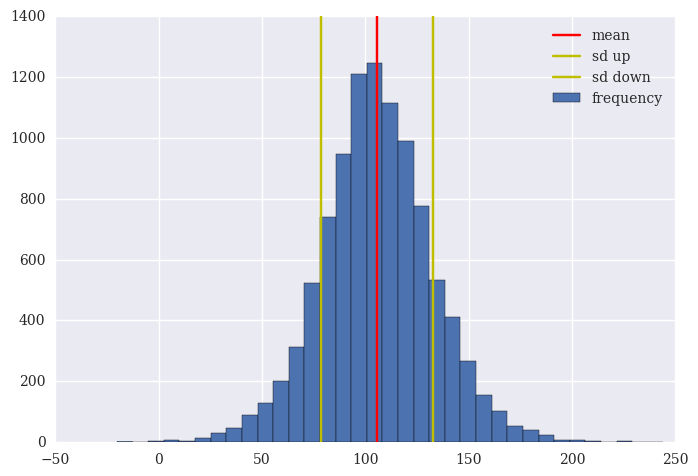

In [96]:
plt.hist(ST, bins=35, label='frequency');
plt.axvline(ST.mean(), color='r', label='mean')
plt.axvline(ST.mean() + ST.std(), color='y', label='sd up')
plt.axvline(ST.mean() - ST.std(), color='y', label='sd down')
plt.legend(loc=0)
# plt.savefig('../../images/ch05/m76_01.png');

In [97]:
ST = np.maximum(S0 * (
    np.exp((r - rj - sigma ** 2 / 2) * T +
           sigma * math.sqrt(T) * z[0]) + 
    (np.exp(mu + delta * z[1]) - 1) * y
), 0)

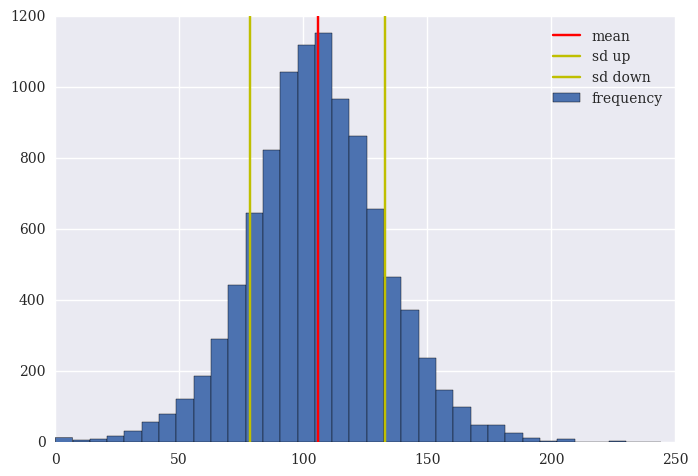

In [98]:
plt.hist(ST, bins=35, label='frequency');
plt.axvline(ST.mean(), color='r', label='mean')
plt.axvline(ST.mean() + ST.std(), color='y', label='sd up')
plt.axvline(ST.mean() - ST.std(), color='y', label='sd down')
plt.legend(loc=0)
# plt.savefig('../../images/ch05/m76_02.png');

In [99]:
K = 105

In [100]:
CT = np.maximum(ST - K, 0)

In [101]:
C0 = math.exp(-r * T)  * np.mean(CT)

In [102]:
C0

10.322864494488943

In [103]:
M = np.array((BT, ST)).T

In [104]:
phi = np.linalg.lstsq(M, CT)[0]

In [105]:
phi

array([-0.41917757,  0.51909264])

In [106]:
np.mean(np.dot(M, phi) - CT)

-5.3188387028058058e-14

In [107]:
np.dot(M0, phi)

9.9915064696520517

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Python Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>